In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
#load data/Load_MIDC_10yrs.csv as a dataframe
df = pd.read_csv("data/RTLoad_MIDC+NW_10yrs.csv")
names = df['name'].unique()
#subtract 7 hours from datetime to convert from UTC to PST
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'] - pd.Timedelta(hours=7)
df = pd.concat([df, df.groupby('datetime').agg({'avgvalue': 'sum'}).rename(columns={'avgvalue': 'avgvalue'}).assign(name='Total').reset_index()])
df['date'] = df['datetime'].dt.date

In [4]:
#print avista corporation datetime between 2025-02-11 and 2025-02-13
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
print(df[(df['name']=='Avista Corporation') & (df['date']>=pd.to_datetime('2025-02-11').date()) & (df['date']<=pd.to_datetime('2025-02-13').date())])
# Reset the option to default if you don't want it to affect other cells
pd.reset_option('display.max_rows')

                 datetime  avgvalue objectid                name  yes_objectid    iso        date
96576 2025-02-11 00:00:00    1713.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96577 2025-02-11 01:00:00    1660.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96578 2025-02-11 02:00:00    1642.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96579 2025-02-11 03:00:00    1640.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96580 2025-02-11 04:00:00    1658.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96581 2025-02-11 05:00:00    1693.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96582 2025-02-11 06:00:00    1763.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96583 2025-02-11 07:00:00    1895.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96584 2025-02-11 08:00:00    2055.0  L000053  Avista Corporation  1.000395e+10  CAISO  2025-02-11
96585 2025-02-11 09:

In [5]:
#add rows in df for Load across all names for each datetime


In [6]:
#print df for a particular day
df[df['datetime'] == pd.to_datetime('2023-01-01 01:00:00')]

,datetime,avgvalue,objectid,name,yes_objectid,iso,date
3647,2023-01-01 01:00:00,2359.00,L000091,Portland General Electric Company,1.000395e+10,CAISO,2023-01-01
53874,2023-01-01 01:00:00,1338.00,L000079,NorthWestern Corporation,1.000395e+10,CAISO,2023-01-01
181472,2023-01-01 01:00:00,6405.25,L000060,BPA,1.000185e+10,CAISO,2023-01-01
256991,2023-01-01 01:00:00,NaN,L000051,AVRN,1.001711e+10,CAISO,2023-01-01
280910,2023-01-01 01:00:00,495.00,L000066,"City of Tacoma, Department of Public Utilities",1.000395e+10,CAISO,2023-01-01
329122,2023-01-01 01:00:00,1216.00,L000053,Avista Corporation,1.000395e+10,CAISO,2023-01-01
392288,2023-01-01 01:00:00,1041.00,L000098,Seattle City Light,1.000395e+10,CAISO,2023-01-01
438337,2023-01-01 01:00:00,1881.00,L000073,Idaho Power Company,1.000395e+10,CAISO,2023-01-01
472833,2023-01-01 01:00:00,2791.00,L000093,"Puget Sound Energy, Inc.",1.000395e+10,CAISO,2023-01-01
61376,2023-01-01 01:00:00,17526.25,NaN,Total,NaN,NaN,2023-01-01


In [7]:
#groupby name and date, then find sum and max of load
selected_names = {
    'PGE': 'Portland General Electric Company',
    'AVA': 'Avista Corporation',
    'GCPD': 'PUD No. 2 of Grant County, Washington',
    'PSEI': 'Puget Sound Energy, Inc.',
    'TPWR': 'City of Tacoma, Department of Public Utilities',
    'BPA': 'BPA',
    'DOPD': 'PUD No. 1 of Douglas County',
    'SCL': 'Seattle City Light',
    'CHPD': 'Public Utility District No. 1 of Chelan County',
    'PACW': 'PacifiCorp West',
    'Total': 'Total'
}
peakload = df[df['name'].isin(selected_names.values())].groupby(['name', 'date']).agg({'avgvalue': 'max'})
peakload.columns = ['peak_load']


In [14]:
for i in selected_names.keys():    
    print(i)

PGE
AVA
GCPD
PSEI
TPWR
BPA
DOPD
SCL
CHPD
PACW
Total


In [8]:
peakload

peak_load
name               date                 
Avista Corporation 2021-12-31        NaN
                   2022-01-01        NaN
                   2022-01-02        NaN
                   2022-01-03        NaN
                   2022-01-04        NaN
...                                  ...
Total              2025-08-26        0.0
                   2025-08-27        0.0
                   2025-08-28        0.0
                   2025-08-29        0.0
                   2025-08-30        0.0

[18466 rows x 1 columns]

In [9]:
#print peakload total for date from 8/29/2025 to 9-10-2025
print(peakload.loc[('Avista Corporation', slice(pd.to_datetime('2025-2-1').date(), pd.to_datetime('2025-02-20').date())), :])
# convert (25,337)	(24,766)	(23,751)	(22,941)	(21,773)	(20,407) to array
array = [25337, 24766, 23751, 22941, 21773, 20407, 21565]
# find difference between array and peakload.loc[('PNW', slice(pd.to_datetime('2025-7-29').date(), pd.to_datetime('2025-08-04').date())), :]
peakload.loc[('Total', slice(pd.to_datetime('2025-7-29').date(), pd.to_datetime('2025-08-04').date())), :]['peak_load'].values - array

                               peak_load
name               date                 
Avista Corporation 2025-02-01     1538.0
                   2025-02-02     1637.0
                   2025-02-03     1708.0
                   2025-02-04     1867.0
                   2025-02-05     1841.0
                   2025-02-06     1762.0
                   2025-02-07     1811.0
                   2025-02-08     1695.0
                   2025-02-09     1732.0
                   2025-02-10     2050.0
                   2025-02-11     2129.0
                   2025-02-12     2217.0
                   2025-02-13     2169.0
                   2025-02-14     1825.0
                   2025-02-15     1668.0
                   2025-02-16     1660.0
                   2025-02-17     1684.0
                   2025-02-18     1649.0
                   2025-02-19     1691.0
                   2025-02-20     1642.0


array([-334.75    , -133.5     ,   65.      , -138.5     , -254.75    ,
         95.666667, -405.166667])

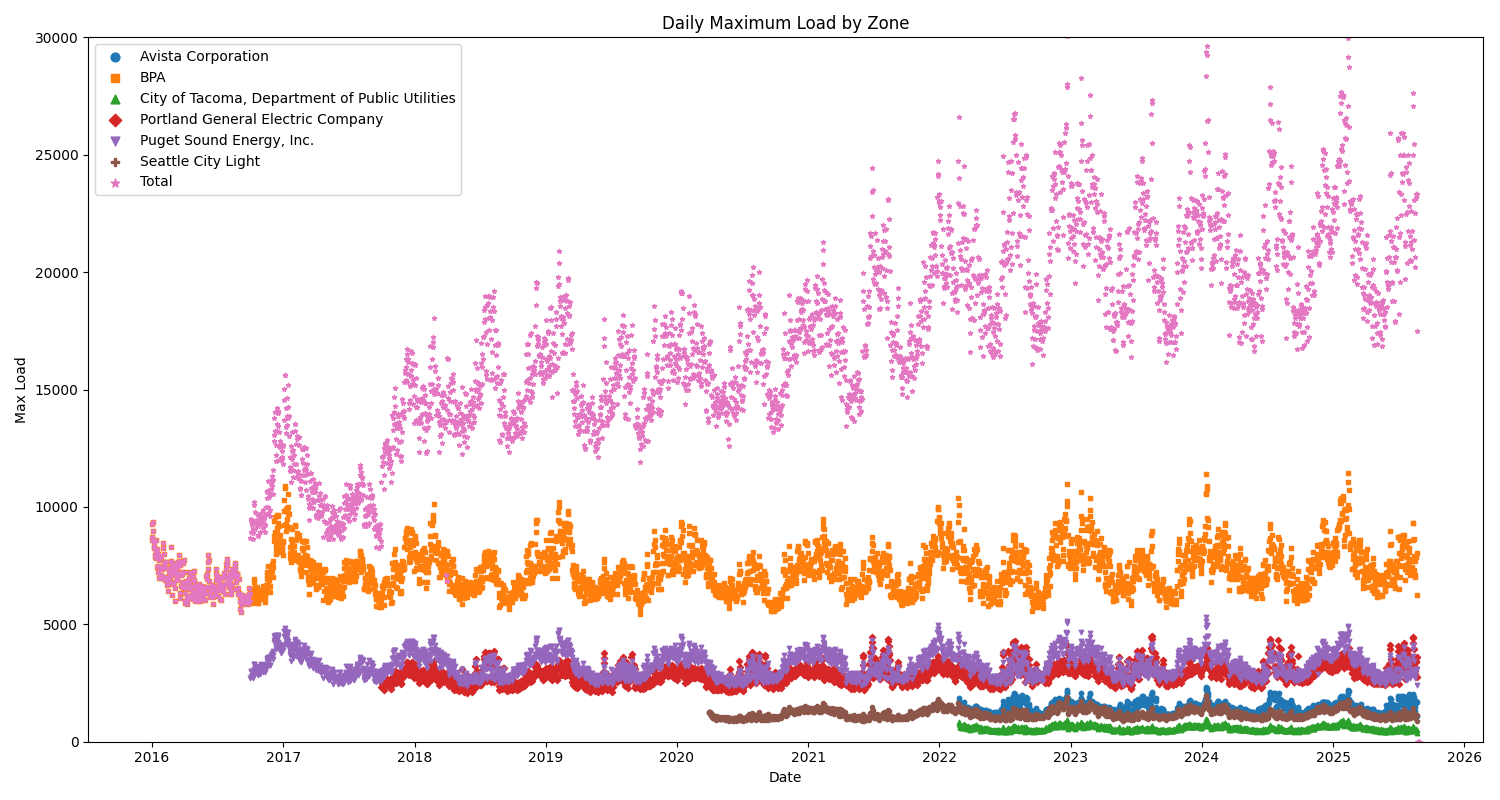

In [10]:
# plot exponential scale for y axis
plt.figure(figsize=(15, 8))
ax = plt.gca()
marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', 'H', '<', '>']

lines = []
labels = []
# Get unique names from the peakload index, which includes 'total'
unique_names = peakload.index.get_level_values('name').unique()

for i, name in enumerate(unique_names):
    # Select data for the current name
    subset = peakload.loc[name]
    
    # Use different style for 'total'
    if name == 'total':
        marker = 'o'
        color = 'black'
        size = 20
    else:
        marker = marker_styles[i % len(marker_styles)]
        color = None  # Use default color cycle
        size = 10

    # Plot using scatter. The index of the subset is the date.
    line = ax.scatter(
        subset.index,
        subset['peak_load'],
        label=name,
        s=size,
        marker=marker,
        color=color
    )  # <-- This is the line for plotting the data
    lines.append(line)
    labels.append(name)

ax.set_xlabel('Date')
ax.set_ylabel('Max Load')
plt.ylim(bottom=0,top=30000)
ax.set_title('Daily Maximum Load by Zone')

plt.tight_layout()
plt.legend(markerscale=2)
plt.show()

In [44]:
EGPS = {
    '8/10': [19283, 10800, 8482, 23768, 1915, 8164, 241, 322, 936, 3350, 3857, 3275, 1159, 549],
    '8/11': [19851, 10824, 9027, 26457, 2140, 9011, 268, 354, 1017, 3810, 4312, 3620, 1301, 625],
    '8/12': [20280, 11250, 9030, 27306, 2213, 9316, 281, 358, 1027, 3858, 4415, 3837, 1350, 652],
    '8/13': [19192, 10617, 8575, 24123, 2062, 8422, 268, 352, 1013, 3402, 3541, 3277, 1213, 574],
    '8/14': [18618, 10538, 8080, 22622, 1839, 7863, 246, 328, 961, 3191, 3336, 3147, 1157, 554],
    '8/15': [18376, 10594, 7782, 21511, 1754, 7732, 239, 320, 940, 3065, 3053, 2831, 1078, 499],
    '8/16': [18175, 10372, 7802, 19729, 1648, 7117, 222, 298, 888, 2710, 2829, 2591, 980, 448],
    '8/17': [18199, 10532, 7667, 20054, 1648, 7186, 216, 294, 873, 2742, 2922, 2697, 1013, 463],
    '8/18': [18780, 10792, 7988, 21761, 1798, 7742, 238, 320, 938, 3064, 3119, 2934, 1094, 513]
}

index = ['Canada', 'AESO', 'BCH', 'total', 'AVA', 'BPA', 'CHPD', 'DOPD', 'GCPD', 'PACW', 'PGE', 'PSEI', 'SCL', 'TPWR']

df_image = pd.DataFrame(EGPS, index=index)
df_image.index.name = 'Peak Hour'
df_image = df_image.drop(['Canada', 'AESO', 'BCH']).rename(index={'PNW': 'total'})
df_image.columns = pd.to_datetime([f'{col}/2025' for col in df_image.columns], format='%m/%d/%Y').date

In [45]:
df_image

,2025-08-10,2025-08-11,2025-08-12,2025-08-13,2025-08-14,2025-08-15,2025-08-16,2025-08-17,2025-08-18
Peak Hour,,,,,,,,,
total,23768,26457,27306,24123,22622,21511,19729,20054,21761
AVA,1915,2140,2213,2062,1839,1754,1648,1648,1798
BPA,8164,9011,9316,8422,7863,7732,7117,7186,7742
CHPD,241,268,281,268,246,239,222,216,238
DOPD,322,354,358,352,328,320,298,294,320
GCPD,936,1017,1027,1013,961,940,888,873,938
PACW,3350,3810,3858,3402,3191,3065,2710,2742,3064
PGE,3857,4312,4415,3541,3336,3053,2829,2922,3119
PSEI,3275,3620,3837,3277,3147,2831,2591,2697,2934


In [ ]:
# 1. Modify df_image: Drop rows and convert column names to dates


# 2. Modify peakload: Convert long names to short names in the index
# Create a reverse mapping from long name to short name
name_map_inverted = {v: k for k, v in selected_names.items()}
# Add 'total' to the mapping as it's not in selected_names
name_map_inverted['total'] = 'total'

#reset index of peakload
peakload_unique = peakload.reset_index()

# Get the current index levels
names = peakload_unique['name']

# Create the new 'name' index using the inverted map
new_names = names.map(name_map_inverted)

# Create a copy and set the new index
peakload_mod = peakload_unique.copy()
peakload_mod['name'] = new_names
peakload_mod.set_index(['name', 'date'], inplace=True)

In [ ]:
peakload_pivot

date,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2025-08-21,2025-08-22,2025-08-23,2025-08-24,2025-08-25,2025-08-26,2025-08-27,2025-08-28,2025-08-29,2025-08-30
name,,,,,,,,,,,,,,,,,,,,,
AVA,1991.0,2003.0,2057.0,2021.0,1944.0,1874.0,1832.0,1805.0,1810.0,1751.0,...,1937.0,1686.70,1733.09,1731.36,1872.44,1840.82,1830.68,1807.16,1169.24,NaN
BPA,8634.0,8729.0,9298.0,9365.0,8990.0,8627.0,8509.0,8297.0,8327.0,7968.0,...,8210.0,8181.32,8169.60,7589.25,7618.24,7940.04,7999.33,7918.04,6258.43,NaN
CHPD,371.0,404.0,400.0,403.0,373.0,343.0,318.0,306.0,308.0,286.0,...,247.0,174.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOPD,298.0,321.0,320.0,321.0,291.0,267.0,251.0,242.0,239.0,223.0,...,325.0,255.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCPD,594.0,617.0,645.0,649.0,617.0,604.0,574.0,581.0,573.0,542.0,...,974.0,823.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PACW,3296.0,3223.0,3438.0,3299.0,3368.0,12633.0,3306.0,3269.0,3282.0,2924.0,...,3408.0,2402.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PGE,3285.0,3187.0,3298.0,3472.0,3424.0,3281.0,3219.0,3087.0,3107.0,2907.0,...,3695.0,4198.00,3933.36,3273.08,3538.11,3413.91,3566.46,3443.28,2728.12,NaN
PSEI,5085.0,4697.0,4795.0,4974.0,4972.0,4769.0,4753.0,4793.0,4724.0,4641.0,...,3118.0,3355.27,3348.25,3182.98,3413.08,3316.27,3529.26,3419.46,2550.16,NaN
SCL,1588.0,1455.0,1475.0,1587.0,1654.0,1570.0,1519.0,1535.0,1542.0,1477.0,...,1131.0,1200.44,1140.56,1107.62,1223.94,1190.54,1245.06,1213.67,955.09,NaN


In [ ]:
peakload_pivot = peakload_mod.unstack(level='date')

# The column index is now a MultiIndex: ('max_load', date). 
# We'll simplify it to just the date.
peakload_pivot.columns = peakload_pivot.columns.get_level_values('date')

# Ensure the reshaped DataFrame has the exact same rows and columns as df_image
# This selects the relevant dates and orders the names correctly.
comparison_df = peakload_pivot.reindex(index=df_image.index, columns=df_image.columns)

# 4. Compare the two DataFrames by calculating their percentage difference
difference_df = ((df_image - comparison_df) / comparison_df) * 100

# Set display options to use more horizontal space to avoid wrapping
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 20)

print("--- DataFrame from peakload (Reshaped) ---")
print(comparison_df)
print("\n--- DataFrame from image ---")
print(df_image)
print("\n--- Percentage Difference ((Image - peakload) / peakload) * 100 ---")
print(difference_df)

--- DataFrame from maxload (Reshaped) ---
           2025-08-10  2025-08-11  2025-08-12  2025-08-13  2025-08-14  2025-08-15  2025-08-16  2025-08-17  2025-08-18
Peak Hour                                                                                                            
total             NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
AVA            2027.0      2185.0      2179.0     2061.00     1866.00     1643.24     1496.00     1660.00     1856.00
BPA            8732.0      9397.0      9449.0     8789.00     8024.00     7455.00     7128.00     7227.00     7835.00
CHPD            267.0       285.0       288.0      263.00      253.00      214.00      217.00      217.00      234.00
DOPD            336.0       356.0       366.0      343.00      331.00      287.00      282.00      286.00      306.00
GCPD            930.0      1019.0      1031.0      996.00      980.00      905.00      861.00      855.00      910.00
PACW          

In [ ]:
peakload_mod

max_load
name date                
AVA  2015-12-31   1991.00
     2016-01-01   2003.00
     2016-01-02   2057.00
     2016-01-03   2021.00
     2016-01-04   1944.00
...                   ...
SCL  2025-08-26   1190.54
     2025-08-27   1245.06
     2025-08-28   1213.67
     2025-08-29    955.09
     2025-08-30       NaN

[35306 rows x 1 columns]

In [ ]:
peakload

max_load
name               date                
Avista Corporation 2015-12-31   1991.00
                   2016-01-01   2003.00
                   2016-01-02   2057.00
                   2016-01-03   2021.00
                   2016-01-04   1944.00
...                                 ...
Seattle City Light 2025-08-26   1190.54
                   2025-08-27   1245.06
                   2025-08-28   1213.67
                   2025-08-29    955.09
                   2025-08-30       NaN

[35306 rows x 1 columns]